#### QF 621 - Pair trading using technical indicators

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

In [3]:
import statsmodels.api as sm

In [4]:
np.set_printoptions(precision = 3)

pd.set_option("precision", 3)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

In [5]:
%matplotlib inline

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [6]:
tickers = [('A', 'MTD'), ('ADP', 'PAYX'), ('FFIV', 'STX'), ('FFIV', 'ZBRA'), ('MPWR', 'TER'), ('ADI', 'TXN'), ('AMZN', 'CRM'), ('ADBE', 'ANSS'), ('AJG', 'BRO'), ('AJG', 'NDAQ'), ('ABT', 'LLY'), ('CRL', 'IDXX'), ('CRL', 'TECH'), ('AIZ', 'CB'), ('AIZ', 'CINF'), ('AIZ', 'WRB'), ('BK', 'PRU'), ('ANTM', 'DGX'), ('ANTM', 'LH'), ('CL', 'KMB'), ('AVB', 'EQR'), ('AVB', 'ESS'), ('EIX', 'PPL'), ('AEE', 'LNT')]

In [7]:
data = pd.read_csv("equity_data_full")

In [8]:
data.index = data["ticker"]
data.drop(columns= ["Unnamed: 0", "ticker"] , inplace=True)

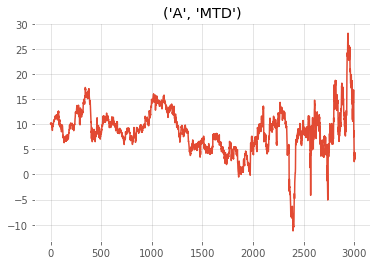

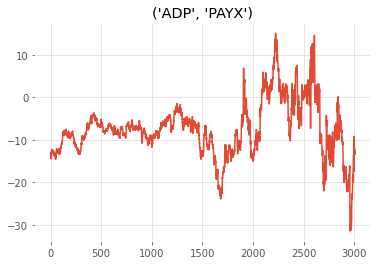

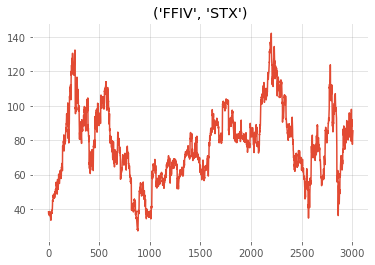

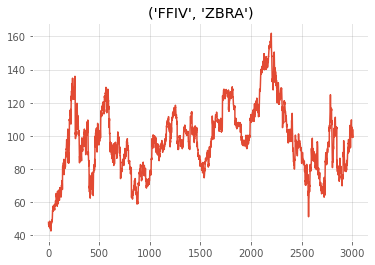

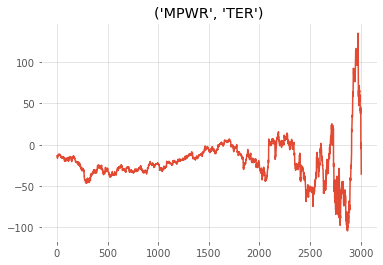

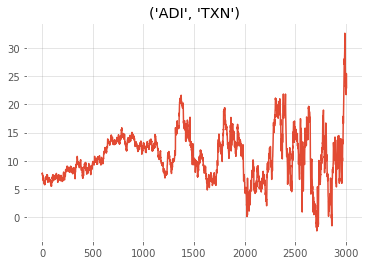

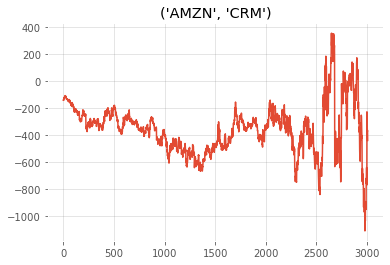

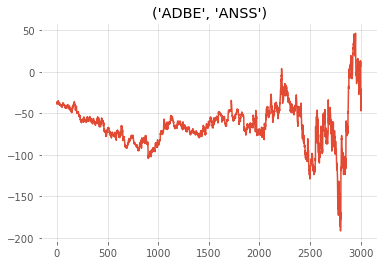

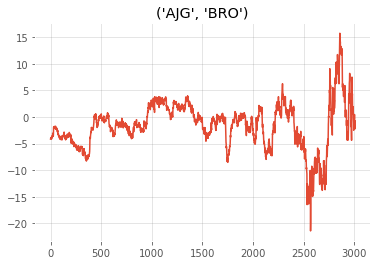

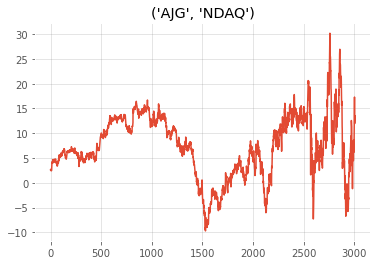

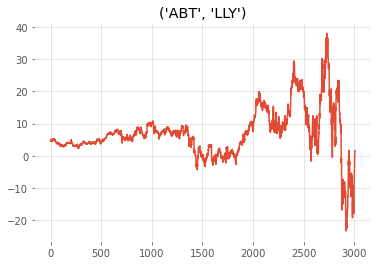

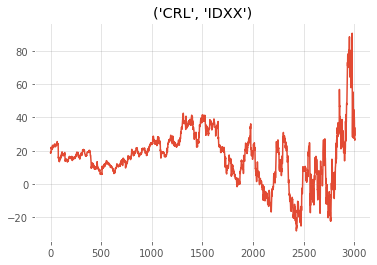

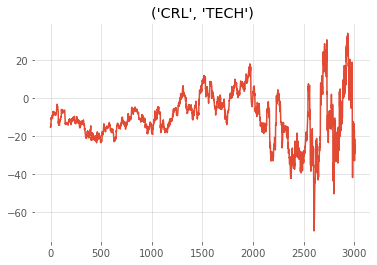

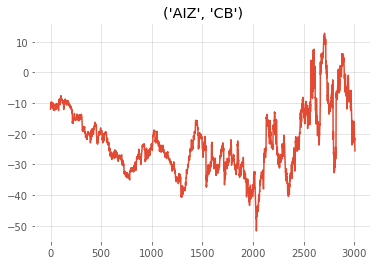

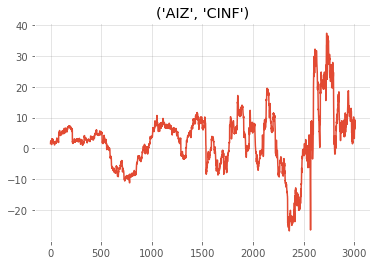

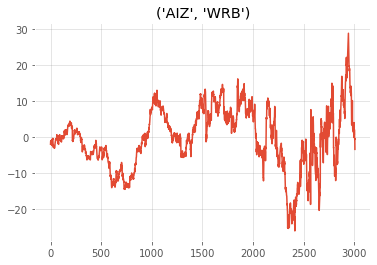

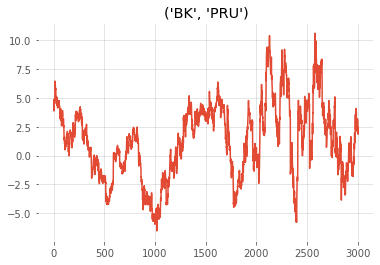

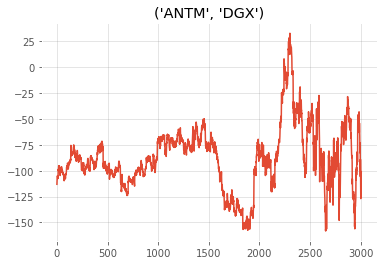

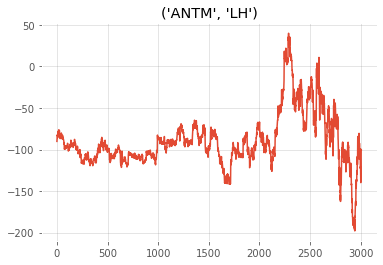

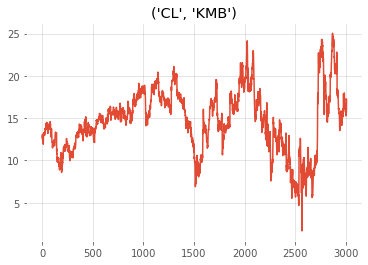

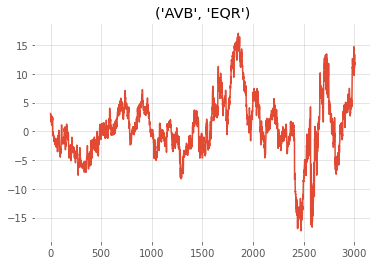

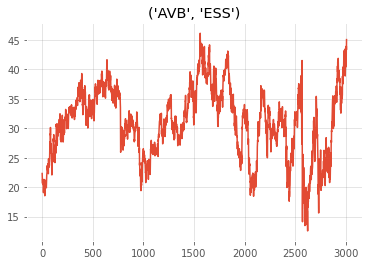

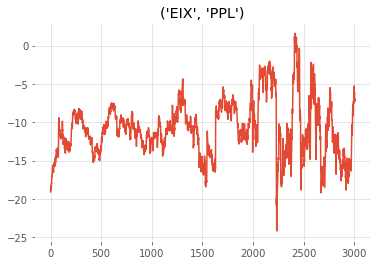

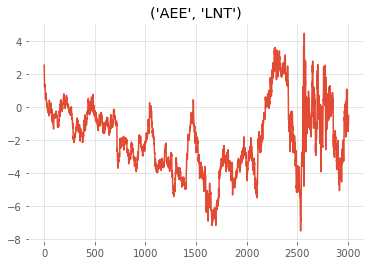

In [9]:
betas = []
stocks = []
spread = []

for i in range(0, len(tickers)):
    plt.figure()
    pair = []
    
    for j in range(0, len(tickers[i])):
        
        pair.append(data.loc[tickers[i][j]].adjclose)
    
    X = sm.add_constant(pair[1].values)
    MODEL = sm.OLS(pair[0].values, X).fit()
    betas.append(MODEL.params[1])
    spread.append(pair[0].values - (betas[i] * pair[1]).values)
    plt.plot(spread[i])
    plt.title(tickers[i])
    plt.show()

In [10]:
pair_spread = pd.DataFrame(spread).T
pair_spread.columns = tickers
pair_spread.index = data["date"].unique()

In [11]:
pair_spread

,"(A, MTD)","(ADP, PAYX)","(FFIV, STX)","(FFIV, ZBRA)","(MPWR, TER)","(ADI, TXN)","(AMZN, CRM)","(ADBE, ANSS)","(AJG, BRO)","(AJG, NDAQ)",...,"(AIZ, CINF)","(AIZ, WRB)","(BK, PRU)","(ANTM, DGX)","(ANTM, LH)","(CL, KMB)","(AVB, EQR)","(AVB, ESS)","(EIX, PPL)","(AEE, LNT)"
2010-01-04,10.115,-13.075,38.415,47.907,-13.464,7.724,-139.085,-38.628,-4.136,2.615,...,1.595,-2.007,4.526,-113.131,-90.209,12.662,3.103,22.319,-19.086,2.547
2010-01-05,10.148,-13.196,37.260,46.458,-13.679,7.778,-137.128,-36.321,-4.077,2.493,...,2.292,-1.208,4.415,-109.179,-87.947,12.900,2.889,21.699,-18.745,2.128
2010-01-06,10.152,-13.589,37.607,46.744,-14.069,7.849,-139.094,-35.909,-3.895,2.507,...,2.172,-1.331,3.870,-105.885,-84.816,13.057,2.069,20.944,-18.547,1.891
2010-01-07,10.296,-14.246,37.366,46.365,-14.568,7.615,-140.140,-36.826,-4.004,2.582,...,2.387,-1.138,4.506,-105.486,-82.852,13.054,1.676,20.703,-18.283,1.643
2010-01-08,10.127,-14.311,38.219,47.114,-14.718,7.390,-137.021,-37.535,-3.863,2.489,...,2.477,-1.101,4.887,-105.250,-82.413,12.608,1.941,20.643,-18.273,1.223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-06,4.376,-13.327,81.035,100.840,-4.538,21.740,-348.893,-46.985,0.479,17.302,...,6.778,0.609,2.011,-120.276,-129.268,16.717,11.141,42.944,-6.087,-1.476
2021-12-07,3.770,-12.816,81.813,103.955,2.098,23.702,-373.229,-34.619,-0.230,13.791,...,6.219,-0.156,1.917,-120.965,-134.268,15.739,11.538,41.822,-7.261,-0.936
2021-12-08,4.364,-13.462,83.130,101.375,-2.057,25.483,-363.435,-33.192,-2.267,11.956,...,6.668,-0.661,2.127,-116.268,-130.864,15.684,11.929,43.942,-7.270,-0.676
2021-12-09,3.046,-12.538,84.319,100.346,-12.525,25.351,-374.133,-36.183,-2.256,12.860,...,9.291,-0.436,2.467,-104.502,-99.798,15.988,11.548,43.315,-7.230,-0.481


#### END

In [12]:
AEE = data.loc["AEE"][["adjclose"]]

In [13]:
LNT = data.loc["LNT"][["adjclose"]]

In [14]:
AEE["Return"] = np.log(AEE.adjclose / AEE.adjclose.shift(1))

In [15]:
LNT["Return"] = np.log(LNT.adjclose / LNT.adjclose.shift(1))

In [16]:
AEE.dropna(inplace=True)
LNT.dropna(inplace=True)

<AxesSubplot:xlabel='ticker'>

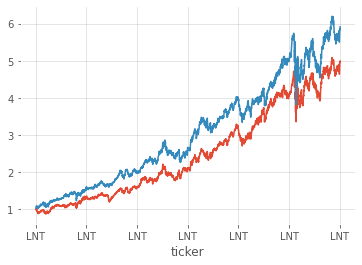

In [17]:
AEE["Return"].cumsum().apply(np.exp).plot()
LNT["Return"].cumsum().apply(np.exp).plot()

In [18]:
AEE

,adjclose,Return
ticker,,
AEE,17.414,-0.004
AEE,17.294,-0.007
AEE,17.130,-0.010
AEE,17.011,-0.007
AEE,17.149,0.008
...,...,...
AEE,85.390,0.011
AEE,86.530,0.013
AEE,86.790,0.003


In [19]:
X = sm.add_constant(LNT["adjclose"].values)
MODEL = sm.OLS(AEE["adjclose"].values, X).fit()

print(MODEL.params)
print(MODEL.rsquared)
print(str(MODEL.summary()))

[-1.856  1.5  ]
0.9903565312082804
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.085e+05
Date:                Wed, 25 May 2022   Prob (F-statistic):               0.00
Time:                        17:20:09   Log-Likelihood:                -6483.3
No. Observations:                3006   AIC:                         1.297e+04
Df Residuals:                    3004   BIC:                         1.298e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.

In [20]:
y = (MODEL.params[1] * LNT["adjclose"]).values

In [21]:
x = AEE["adjclose"].values

In [22]:
x

array([17.414, 17.294, 17.13 , ..., 86.79 , 86.7  , 87.24 ])

In [23]:
y

array([15.287, 15.405, 15.489, ..., 87.474, 87.189, 88.314])

<AxesSubplot:>

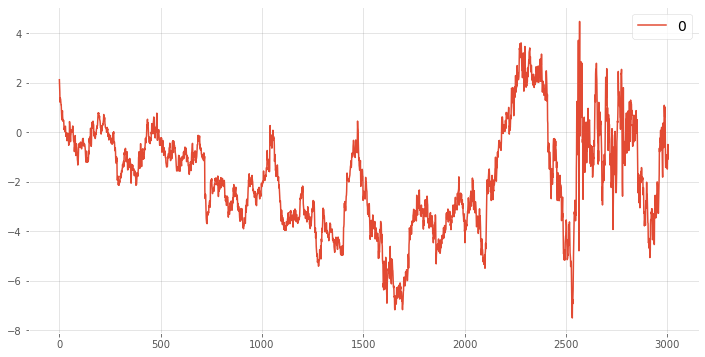

In [24]:
pd.DataFrame([x - y]).T.plot(figsize=(12,6))

In [25]:
data.index.unique()

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE',
       ...
       'XEL', 'XLNX', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION',
       'ZTS'],
      dtype='object', name='ticker', length=505)